In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import pytry
import matplotlib.pyplot as plt
import scipy.stats as stats

C:\Users\mbartlett2\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")


# Dimensions Experiment

In [ ]:
data_dims = pd.DataFrame(pytry.read('ICCM_dims'))
#data_dims

In [ ]:
result_dims = pd.DataFrame({'training (80%)': pd.concat([data_dims.classify_train]), 'testing (20%)': pd.concat([data_dims.classify_test]), 'aimless': pd.concat([data_dims.classify_aim])})
#result_dims

Now let's look at how well the system did on each data set.

In [ ]:
errors = result_dims.std()
ax = result_dims.mean().plot(kind='bar', yerr=errors)
ax.set_ylabel("Classification Accuracy (mean)")
ax.set_xlabel("Classification Test")

In [ ]:
print('Mean Accuracy Training Patterns: ', (result_dims["training (80%)"].mean())*100)
print('Mean Accuracy Testing Patterns: ', (result_dims["testing (20%)"].mean())*100)
print('Mean Accuracy Aimless Patterns: ', (result_dims["aimless"].mean())*100)

In [ ]:
errors

Next we look at whether the number of dimensions had an effect on accuracy of classification.

In [ ]:
by_dim = data_dims.groupby(['n_dims'])['classify_train','classify_test','classify_aim'].mean()
by_dim_errors = data_dims.groupby(['n_dims'])['classify_train','classify_test','classify_aim'].std()

bx = by_dim.plot(kind='bar', yerr=by_dim_errors, figsize=(11,8)) #plot
bx.set_ylabel("Classification Accuracy (mean)")
bx.set_xlabel("Number of Dimensions")

In [ ]:
by_dim

In [ ]:
by_dim_errors

In [ ]:
stats.f_oneway(data_dims['classify_train'][data_dims['n_dims'] == 1], 
             data_dims['classify_train'][data_dims['n_dims'] == 2],
             data_dims['classify_train'][data_dims['n_dims'] == 3],
             data_dims['classify_train'][data_dims['n_dims'] == 4])

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
 
mod = ols('classify_train ~ n_dims',
                data=data_dims).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

In [ ]:
effect_size = aov_table['sum_sq'][0]/(aov_table['sum_sq'][0]+aov_table['sum_sq'][1]) #eta squared
effect_size

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

mc = MultiComparison(data_dims['classify_train'], data_dims['n_dims'])
mc_results = mc.tukeyhsd()
print(mc_results)

Histogram plots of the actual classification outputs for each pattern type. 
**Note**: this is across the whole experiment.

In [ ]:
gtrx = pd.DataFrame({'goal_train': pd.concat([eval('data_dims.accuracy_train%d' % i) for i in range(100)])})

gtsx = pd.DataFrame({'goal_test': pd.concat([eval('data_dims.accuracy_test%d' % i) for i in range(100)])})

ntrx = pd.DataFrame({'noplay_train': pd.concat([eval('data_dims.accuracy_train%d' % i) for i in range(100,200)])})

ntsx = pd.DataFrame({'noplay_test': pd.concat([eval('data_dims.accuracy_test%d' % i) for i in range(100,200)])}) 

ax = pd.DataFrame({'aimless': pd.concat([eval('data_dims.accuracy_aim%d' % i) for i in range(100)])})

In [ ]:
goal_train = []
for i in range(len(gtrx)):
    a = gtrx.iloc[i].values
    b = np.concatenate(a).ravel().tolist()
    goal_train.append(b)
goal_train = np.asarray(goal_train)

goal_test = []
for i in range(len(gtsx)):
    a = gtsx.iloc[i].values
    b = np.concatenate(a).ravel().tolist()
    goal_test.append(b)
goal_test = np.asarray(goal_test)

noplay_train = []
for i in range(len(ntrx)):
    a = ntrx.iloc[i].values
    b = np.concatenate(a).ravel().tolist()
    noplay_train.append(b)
noplay_train = np.asarray(noplay_train)

noplay_test = []
for i in range(len(ntsx)):
    a = ntsx.iloc[i].values
    b = np.concatenate(a).ravel().tolist()
    noplay_test.append(b)
noplay_test = np.asarray(noplay_test)

aimless = []
for i in range(len(ax)):
    a = ax.iloc[i].values
    b = np.concatenate(a).ravel().tolist()
    aimless.append(b)
aimless = np.asarray(aimless)

In [ ]:
#bins=[-4, -3.5, -3, -2.5, -2, -1.5, -1, 0, 1, 1.5, 2, 2.5, 3, 3.5, 4]
#bins=[-2.5, -2, -1.5, -1, 0, 1, 1.5, 2, 2.5]
#bins=[-1.5, -1.25, -1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1, 1.25, 1.5]
#bins=np.arange(min(aimless), max(aimless) + 0.25, 0.25)
bins=np.arange(-2, 2 + 0.25, 0.25)
plt.hist(goal_train, bins=bins, rwidth=0.95, alpha=0.65, label='goal train')
plt.hist(goal_test, bins=bins, rwidth=0.95, alpha=0.65, label='goal test')
plt.legend(loc='upper right')


In [ ]:
plt.hist(noplay_train, bins=bins, rwidth=0.95, alpha=0.65, label='noplay train')
plt.hist(noplay_test, bins=bins, rwidth=0.95, alpha=0.65, label='noplay test')
plt.legend(loc='upper right')

In [ ]:
plt.hist(aimless, bins=bins, rwidth=0.95, alpha=0.5, label='aimless test')

In [ ]:
plt.hist(goal_test, bins=bins, rwidth=0.95, alpha=0.5, label='goal train', histtype=u'step')
plt.hist(aimless, bins=bins, rwidth=0.95, alpha=0.5, label='aimless test', histtype=u'step')
plt.hist(noplay_test, bins=bins, rwidth=0.95, alpha=0.5, label='noplay test', histtype=u'step')
plt.legend(loc='upper right')

Now we want histogram plots for each dimension condition.

In [ ]:
goaltrain1 = goal_train[0::4]
goaltrain2 = goal_train[1::4]
goaltrain3 = goal_train[2::4]
goaltrain4 = goal_train[3::4]

In [ ]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, figsize=(15, 4))
f.suptitle('Classification of Goal Training Patterns in each Dimension Condition')
ax1.hist(goaltrain1, bins=bins, rwidth=0.95, alpha=0.5, label='1 input dim')
ax1.set_title('1 input dim')
ax2.hist(goaltrain2, bins=bins, rwidth=0.95, alpha=0.5, label='2 input dims')
ax2.set_title('2 input dims')
ax3.hist(goaltrain3, bins=bins, rwidth=0.95, alpha=0.5, label='3 input dims')
ax3.set_title('3 input dims')
ax4.hist(goaltrain4, bins=bins, rwidth=0.95, alpha=0.5, label='4 input dims')
ax4.set_title('4 input dims')

In [ ]:
goaltest1 = goal_test[0::4]
goaltest2 = goal_test[1::4]
goaltest3 = goal_test[2::4]
goaltest4 = goal_test[3::4]

In [ ]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, figsize=(15, 4))
f.suptitle('Classification of Goal Testing Patterns in each Dimension Condition')
ax1.hist(goaltest1, bins=bins, rwidth=0.95, alpha=0.5, label='1 input dim')
ax1.set_title('1 input dim')
ax2.hist(goaltest2, bins=bins, rwidth=0.95, alpha=0.5, label='2 input dims')
ax2.set_title('2 input dims')
ax3.hist(goaltest3, bins=bins, rwidth=0.95, alpha=0.5, label='3 input dims')
ax3.set_title('3 input dims')
ax4.hist(goaltest4, bins=bins, rwidth=0.95, alpha=0.5, label='4 input dims')
ax4.set_title('4 input dims')

In [ ]:
noplaytrain1 = noplay_train[0::4]
noplaytrain2 = noplay_train[1::4]
noplaytrain3 = noplay_train[2::4]
noplaytrain4 = noplay_train[3::4]

In [ ]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, figsize=(15, 4))
f.suptitle('Classification of No Play Training Patterns in each Dimension Condition')
ax1.hist(noplaytrain1, bins=bins, rwidth=0.95, alpha=0.5, label='1 input dim')
ax1.set_title('1 input dim')
ax2.hist(noplaytrain2, bins=bins, rwidth=0.95, alpha=0.5, label='2 input dims')
ax2.set_title('2 input dims')
ax3.hist(noplaytrain3, bins=bins, rwidth=0.95, alpha=0.5, label='3 input dims')
ax3.set_title('3 input dims')
ax4.hist(noplaytrain4, bins=bins, rwidth=0.95, alpha=0.5, label='4 input dims')
ax4.set_title('4 input dims')

In [ ]:
noplaytest1 = noplay_test[0::4]
noplaytest2 = noplay_test[1::4]
noplaytest3 = noplay_test[2::4]
noplaytest4 = noplay_test[3::4]

In [ ]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, figsize=(15, 4))
f.suptitle('Classification of No Play Testing Patterns in each Dimension Condition')
ax1.hist(noplaytest1, bins=bins, rwidth=0.95, alpha=0.5, label='1 input dim')
ax1.set_title('1 input dim')
ax2.hist(noplaytest2, bins=bins, rwidth=0.95, alpha=0.5, label='2 input dims')
ax2.set_title('2 input dims')
ax3.hist(noplaytest3, bins=bins, rwidth=0.95, alpha=0.5, label='3 input dims')
ax3.set_title('3 input dims')
ax4.hist(noplaytest4, bins=bins, rwidth=0.95, alpha=0.5, label='4 input dims')
ax4.set_title('4 input dims')

In [ ]:
aimless1 = aimless[0::4]
aimless2 = aimless[1::4]
aimless3 = aimless[2::4]
aimless4 = aimless[3::4]

In [ ]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, figsize=(15, 4))
f.suptitle('Classification of Aimless Patterns in each Dimension Condition')
ax1.hist(aimless1, bins=bins, rwidth=0.95, alpha=0.5, label='1 input dim')
ax1.set_title('1 input dim')
ax2.hist(aimless2, bins=bins, rwidth=0.95, alpha=0.5, label='2 input dims')
ax2.set_title('2 input dims')
ax3.hist(aimless3, bins=bins, rwidth=0.95, alpha=0.5, label='3 input dims')
ax3.set_title('3 input dims')
ax4.hist(aimless4, bins=bins, rwidth=0.95, alpha=0.5, label='4 input dims')
ax4.set_title('4 input dims')

Bar charts reporting Average Classification Score for each Pattern Type.

In [ ]:
goal_train_class = pd.DataFrame({'1':goaltrain1[:,0],
                          '2':goaltrain2[:,0],
                          '3':goaltrain3[:,0],
                          '4':goaltrain4[:,0]})
goal_test_class = pd.DataFrame({'1':goaltest1[:,0],
                          '2':goaltest2[:,0],
                          '3':goaltest3[:,0],
                          '4':goaltest4[:,0]})
noplay_train_class = pd.DataFrame({'1':noplaytrain1[:,0],
                          '2':noplaytrain2[:,0],
                          '3':noplaytrain3[:,0],
                          '4':noplaytrain4[:,0]})
noplay_test_class = pd.DataFrame({'1':noplaytest1[:,0],
                          '2':noplaytest2[:,0],
                          '3':noplaytest3[:,0],
                          '4':noplaytest4[:,0]})
aimless_class = pd.DataFrame({'1':aimless1[:,0],
                          '2':aimless2[:,0],
                          '3':aimless3[:,0],
                          '4':aimless4[:,0]})

errorsgtr = goal_train_class.std()
errorsgts = goal_test_class.std()
errorsntr = noplay_train_class.std()
errorsnts = noplay_test_class.std()
errorsa = aimless_class.std()

ax = goal_train_class.mean().plot(kind='bar', yerr=errorsgtr)
ax.set_ylabel("Average Classification for goal training patterns")
ax.set_xlabel("Number of Dimensions")


In [ ]:
ax = goal_test_class.mean().plot(kind='bar', yerr=errorsgts)
ax.set_ylabel("Average Classification for goal testing patterns")
ax.set_xlabel("Number of Dimensions")

In [ ]:
ax = noplay_train_class.mean().plot(kind='bar', yerr=errorsntr)
ax.set_ylabel("Average Classification for noplay training patterns")
ax.set_xlabel("Number of Dimensions")

In [ ]:
ax = noplay_test_class.mean().plot(kind='bar', yerr=errorsnts)
ax.set_ylabel("Average Classification for noplay testing patterns")
ax.set_xlabel("Number of Dimensions")

In [ ]:
ax = aimless_class.mean().plot(kind='bar', yerr=errorsa)
ax.set_ylabel("Average Classification for aimless patterns")
ax.set_xlabel("Number of Dimensions")

# Pattern Length Experiment

In [ ]:
'''import numpy as np
data=data_dims.T
data=data.iloc[100:300]
for i in range(400):  
    v = data[[i]].values
    out = np.concatenate(v).ravel().tolist()
    classify = np.isclose(out, 0, atol=1.0)
    score= np.mean(classify)
    print(score)'''

In [ ]:
data_lens = pd.DataFrame(pytry.read('ICCM_lens'))
#data_lens

In [ ]:
result_lens = pd.DataFrame({'training (80%)': pd.concat([data_lens.classify_train]), 'testing (20%)': pd.concat([data_lens.classify_test]), 'aimless': pd.concat([data_lens.classify_aim])})

In [ ]:
errors = result_lens.std()
lx = result_lens.mean().plot(kind='bar', yerr=errors)
lx.set_ylabel("Classification Accuracy (mean)")
lx.set_xlabel("Classification Test")

In [ ]:
by_len = data_lens.groupby(['len_train'])['classify_train','classify_test','classify_aim'].mean()
by_len_errors = data_lens.groupby(['len_train'])['classify_train','classify_test','classify_aim'].std()

mx = by_len.plot(kind='bar', yerr=by_len_errors, figsize=(11,8)) #plot
mx.set_ylabel("Classification Accuracy (mean)")
mx.set_xlabel("Length of Training Pattern")

In [ ]:
#list = [col for col in data_lens if col.startswith('accuracy_train')]
#list

In [ ]:
training = pd.DataFrame({'training': pd.concat([eval('data_lens.accuracy_train%d' % i) for i in range(800)])})
train_len_10 = training[0::4]
train_len_20 = training[1::4]
train_len_30 = training[2::4]
train_len_40 = training[3::4]

goal_train_10 = train_len_10[:10000]
noplay_train_10 = train_len_10[10000:20000]

goal_train_20 = train_len_20[:20000]
noplay_train_20 = train_len_20[20000:40000]

goal_train_30 = train_len_30[:30000]
noplay_train_30 = train_len_30[30000:60000]

goal_train_40 = train_len_40[:40000]
noplay_train_40 = train_len_40[40000:80000]

gtrxl = pd.DataFrame({'goal_train': pd.concat([goal_train_10.training, goal_train_20.training, goal_train_30.training, goal_train_40.training])})

gtsxl = pd.DataFrame({'goal_test': pd.concat([eval('data_lens.accuracy_test%d' % i) for i in range(100)])})

ntrxl = pd.DataFrame({'noplay_train':  pd.concat([noplay_train_10.training, noplay_train_20.training, noplay_train_30.training, noplay_train_40.training])})

ntsxl = pd.DataFrame({'noplay_test': pd.concat([eval('data_lens.accuracy_test%d' % i) for i in range(100,200)])}) 

axl = pd.DataFrame({'aimless': pd.concat([eval('data_lens.accuracy_aim%d' % i) for i in range(100)])})

In [ ]:
goal_trainl = []
for i in range(len(gtrxl)):
    a = gtrxl.iloc[i].values
    #b = np.concatenate(a).ravel().tolist()
    goal_trainl.append(a)
goal_trainl = np.asarray(goal_trainl)

goal_trainl10 = []
for i in range(len(goal_train_10)):
    a = goal_train_10.iloc[i].values
    #b = np.concatenate(a).ravel().tolist()
    goal_trainl10.append(a)
goal_trainl10 = np.asarray(goal_trainl10)

goal_trainl20 = []
for i in range(len(goal_train_20)):
    a = goal_train_20.iloc[i].values
    #b = np.concatenate(a).ravel().tolist()
    goal_trainl20.append(a)
goal_trainl20 = np.asarray(goal_trainl20)

goal_trainl30 = []
for i in range(len(goal_train_30)):
    a = goal_train_30.iloc[i].values
    #b = np.concatenate(a).ravel().tolist()
    goal_trainl30.append(a)
goal_trainl30 = np.asarray(goal_trainl30)

goal_trainl40 = []
for i in range(len(goal_train_40)):
    a = goal_train_40.iloc[i].values
    #b = np.concatenate(a).ravel().tolist()
    goal_trainl40.append(a)
goal_trainl40 = np.asarray(goal_trainl40)

goal_testl = []
for i in range(len(gtsxl)):
    a = gtsxl.iloc[i].values
    b = np.concatenate(a).ravel().tolist()
    goal_testl.append(b)
goal_testl = np.asarray(goal_testl)

noplay_trainl = []
for i in range(len(ntrxl)):
    a = ntrxl.iloc[i].values
    #b = np.concatenate(a).ravel().tolist()
    noplay_trainl.append(a)
noplay_trainl = np.asarray(noplay_trainl)

noplay_trainl10 = []
for i in range(len(noplay_train_10)):
    a = noplay_train_10.iloc[i].values
    #b = np.concatenate(a).ravel().tolist()
    noplay_trainl10.append(a)
noplay_trainl10 = np.asarray(noplay_trainl10)

noplay_trainl20 = []
for i in range(len(noplay_train_20)):
    a = noplay_train_20.iloc[i].values
    #b = np.concatenate(a).ravel().tolist()
    noplay_trainl20.append(a)
noplay_trainl20 = np.asarray(noplay_trainl20)

noplay_trainl30 = []
for i in range(len(noplay_train_30)):
    a = noplay_train_30.iloc[i].values
    #b = np.concatenate(a).ravel().tolist()
    noplay_trainl30.append(a)
noplay_trainl30 = np.asarray(noplay_trainl30)

noplay_trainl40 = []
for i in range(len(noplay_train_40)):
    a = noplay_train_40.iloc[i].values
    #b = np.concatenate(a).ravel().tolist()
    noplay_trainl40.append(a)
noplay_trainl40 = np.asarray(noplay_trainl40)

noplay_testl = []
for i in range(len(ntsxl)):
    a = ntsxl.iloc[i].values
    b = np.concatenate(a).ravel().tolist()
    noplay_testl.append(b)
noplay_testl = np.asarray(noplay_testl)

aimlessl = []
for i in range(len(axl)):
    a = axl.iloc[i].values
    b = np.concatenate(a).ravel().tolist()
    aimlessl.append(b)
aimlessl = np.asarray(aimlessl)

In [ ]:
#bins=[-4, -3.5, -3, -2.5, -2, -1.5, -1, 0, 1, 1.5, 2, 2.5, 3, 3.5, 4]
#bins=[-2.5, -2, -1.5, -1, 0, 1, 1.5, 2, 2.5]
#bins=[-1.5, -1.25, -1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1, 1.25, 1.5]
#bins=np.arange(min(aimless), max(aimless) + 0.25, 0.25)
bins=np.arange(-2, 2 + 0.25, 0.25)
plt.hist(goal_trainl, bins=bins, rwidth=0.95, alpha=0.65, label='goal train')
plt.hist(goal_testl, bins=bins, rwidth=0.95, alpha=0.65, label='goal test')
plt.legend(loc='upper right')

In [ ]:
plt.hist(noplay_trainl, bins=bins, rwidth=0.95, alpha=0.65, label='noplay train')
plt.hist(noplay_testl, bins=bins, rwidth=0.95, alpha=0.65, label='noplay test')
plt.legend(loc='upper right')

In [ ]:
plt.hist(aimlessl, bins=bins, rwidth=0.95, alpha=0.5, label='aimless test')

In [ ]:
plt.hist(goal_testl, bins=bins, rwidth=0.95, alpha=0.5, label='goal train', histtype=u'step')
plt.hist(aimlessl, bins=bins, rwidth=0.95, alpha=0.5, label='aimless test', histtype=u'step')
plt.hist(noplay_testl, bins=bins, rwidth=0.95, alpha=0.5, label='noplay test', histtype=u'step')
plt.legend(loc='upper right')

In [ ]:
f, (axl1, axl2, axl3, axl4) = plt.subplots(1, 4, sharey=True, figsize=(15, 4))
f.suptitle('Classification of Goal Training Patterns in each Training Length Condition')
axl1.hist(goal_trainl10, bins=bins, rwidth=0.95, alpha=0.5, label='10 seconds training')
axl1.set_title('10 seconds training')
axl2.hist(goal_trainl20, bins=bins, rwidth=0.95, alpha=0.5, label='20 seconds training')
axl2.set_title('20 seconds training')
axl3.hist(goal_trainl30, bins=bins, rwidth=0.95, alpha=0.5, label='30 seconds training')
axl3.set_title('30 seconds training')
axl4.hist(goal_trainl40, bins=bins, rwidth=0.95, alpha=0.5, label='40 seconds training')
axl4.set_title('40 seconds training')

In [ ]:
goal_testl1 = goal_testl[0::4]
goal_testl2 = goal_testl[1::4]
goal_testl3 = goal_testl[2::4]
goal_testl4 = goal_testl[3::4]

In [ ]:
f, (axl1, axl2, axl3, axl4) = plt.subplots(1, 4, sharey=True, figsize=(15, 4))
f.suptitle('Classification of Goal Testing Patterns in each Training Length Condition')
axl1.hist(goal_testl1, bins=bins, rwidth=0.95, alpha=0.5, label='10 seconds training')
axl1.set_title('10 seconds training')
axl2.hist(goal_testl2, bins=bins, rwidth=0.95, alpha=0.5, label='20 seconds training')
axl2.set_title('20 seconds training')
axl3.hist(goal_testl3, bins=bins, rwidth=0.95, alpha=0.5, label='30 seconds training')
axl3.set_title('30 seconds training')
axl4.hist(goal_testl4, bins=bins, rwidth=0.95, alpha=0.5, label='40 seconds training')
axl4.set_title('40 seconds training')

In [ ]:
f, (axl1, axl2, axl3, axl4) = plt.subplots(1, 4, sharey=True, figsize=(15, 4))
f.suptitle('Classification of No Play Training Patterns in each Training Length Condition')
axl1.hist(noplay_trainl10, bins=bins, rwidth=0.95, alpha=0.5, label='10 seconds training')
axl1.set_title('10 seconds training')
axl2.hist(noplay_trainl20, bins=bins, rwidth=0.95, alpha=0.5, label='20 seconds training')
axl2.set_title('20 seconds training')
axl3.hist(noplay_trainl30, bins=bins, rwidth=0.95, alpha=0.5, label='30 seconds training')
axl3.set_title('30 seconds training')
axl4.hist(noplay_trainl40, bins=bins, rwidth=0.95, alpha=0.5, label='40 seconds training')
axl4.set_title('40 seconds training')

In [ ]:
noplay_testl
noplay_testl1 = noplay_testl[0::4]
noplay_testl2 = noplay_testl[1::4]
noplay_testl3 = noplay_testl[2::4]
noplay_testl4 = noplay_testl[3::4]

In [ ]:
f, (axl1, axl2, axl3, axl4) = plt.subplots(1, 4, sharey=True, figsize=(15, 4))
f.suptitle('Classification of No Play Testing Patterns in each Training Length Condition')
axl1.hist(noplay_testl1, bins=bins, rwidth=0.95, alpha=0.5, label='10 seconds training')
axl1.set_title('10 seconds training')
axl2.hist(noplay_testl2, bins=bins, rwidth=0.95, alpha=0.5, label='20 seconds training')
axl2.set_title('20 seconds training')
axl3.hist(noplay_testl3, bins=bins, rwidth=0.95, alpha=0.5, label='30 seconds training')
axl3.set_title('30 seconds training')
axl4.hist(noplay_testl4, bins=bins, rwidth=0.95, alpha=0.5, label='40 seconds training')
axl4.set_title('40 seconds training')

In [ ]:
aimlessl1 = aimlessl[0::4]
aimlessl2 = aimlessl[1::4]
aimlessl3 = aimlessl[2::4]
aimlessl4 = aimlessl[3::4]

In [ ]:
f, (axl1, axl2, axl3, axl4) = plt.subplots(1, 4, sharey=True, figsize=(15, 4))
f.suptitle('Classification of Aimless Testing Patterns in each Training Length Condition')
axl1.hist(aimlessl1, bins=bins, rwidth=0.95, alpha=0.5, label='10 seconds training')
axl1.set_title('10 seconds training')
axl2.hist(aimlessl2, bins=bins, rwidth=0.95, alpha=0.5, label='20 seconds training')
axl2.set_title('20 seconds training')
axl3.hist(aimlessl3, bins=bins, rwidth=0.95, alpha=0.5, label='30 seconds training')
axl3.set_title('30 seconds training')
axl4.hist(aimlessl4, bins=bins, rwidth=0.95, alpha=0.5, label='40 seconds training')
axl4.set_title('40 seconds training')

Bar charts reporting Average Classification Score for each Pattern Type.

In [ ]:
ave_class = pd.DataFrame({'goal testing': pd.concat([gtsxl.goal_test]), 
                          'noplay testing': pd.concat([ntsxl.noplay_test]),
                          'aimless': pd.concat([axl.aimless])})

errors = ave_class.std()
ax = ave_class.mean().plot(kind='bar', yerr=errors)
ax.set_ylabel("Average Classification")
ax.set_xlabel("Classification Test")

In [ ]:
goal_test_class = pd.DataFrame({'10':goal_testl1[:,0],
                          '20':goal_testl2[:,0],
                          '30':goal_testl3[:,0],
                          '40':goal_testl4[:,0]})
noplay_test_class = pd.DataFrame({'10':noplay_testl1[:,0],
                          '20':noplay_testl2[:,0],
                          '30':noplay_testl3[:,0],
                          '40':noplay_testl4[:,0]})
aimless_class = pd.DataFrame({'10':aimlessl1[:,0],
                          '20':aimlessl2[:,0],
                          '30':aimlessl3[:,0],
                          '40':aimlessl4[:,0]})

errorsgts = goal_test_class.std()
errorsnts = noplay_test_class.std()
errorsa = aimless_class.std()

ax = goal_test_class.mean().plot(kind='bar', yerr=errorsgts)
ax.set_ylabel("Average Classification for goal testing patterns")
ax.set_xlabel("Length of Training Pattern")


In [ ]:
ax = noplay_test_class.mean().plot(kind='bar', yerr=errorsnts)
ax.set_ylabel("Average Classification for noplay testing patterns")
ax.set_xlabel("Length of Training Pattern")

In [ ]:
ax = aimless_class.mean().plot(kind='bar', yerr=errorsa)
ax.set_ylabel("Average Classification for noplay testing patterns")
ax.set_xlabel("Length of Training Pattern")

# Experiments Serge Requested

5 seconds training pattern. Results of goal testing patterns

In [ ]:
data_5 = pd.DataFrame(pytry.read('len_5'))

gtsxl = [eval('data_5.accuracy_test%d' % i) for i in range(100)]

len_5_aimless = []
for i in range(len(gtsxl)):
    a = gtsxl[i].values
    b = np.concatenate(a).ravel().tolist()
    len_5_aimless.append(b)
len_5_aimless = np.asarray(len_5_aimless)

plt.hist(len_5_aimless, rwidth=0.95, alpha=0.5, label='5 seconds training')

5 seconds training pattern and 8 input dimensions. Results of goal testing patterns

In [ ]:
data_5_8 = pd.DataFrame(pytry.read('len_5_dim_8'))

gtsxl = [eval('data_5_8.accuracy_test%d' % i) for i in range(100)]

lendim = []
for i in range(len(gtsxl)):
    a = gtsxl[i].values
    b = np.concatenate(a).ravel().tolist()
    lendim.append(b)
lendim = np.asarray(lendim)

plt.hist(lendim, rwidth=0.95, alpha=0.5, label='5 seconds training')

In [ ]:
data_80 = pd.DataFrame(pytry.read('80_secs'))

#list = [col for col in data_80 if col.startswith('accuracy_train')]
#data_80['accuracy_train800']

In [ ]:
data_80 = pd.DataFrame(pytry.read('80_secs'))

gtrx = [eval('data_80.accuracy_train%d' % i) for i in range(800)]

gtsx = [eval('data_80.accuracy_test%d' % i) for i in range(100)]

ntrx = [eval('data_80.accuracy_train%d' % i) for i in range(800,1600)]

ntsx = [eval('data_80.accuracy_test%d' % i) for i in range(100,200)]


goal_train = []
for i in range(len(gtrx)):
    a = gtrx[i].values
    b = np.concatenate(a).ravel().tolist()
    goal_train.append(b)
goal_train = np.asarray(goal_train)

plt.hist(goal_train, rwidth=0.95, alpha=0.5, label='80 seconds training')

In [ ]:
goal_test = []
for i in range(len(gtsx)):
    a = gtsx[i].values
    b = np.concatenate(a).ravel().tolist()
    goal_test.append(b)
goal_test = np.asarray(goal_test)

plt.hist(goal_test, rwidth=0.95, alpha=0.5, label='80 seconds training')

In [ ]:
noplay_train = []
for i in range(len(ntrx)):
    a = ntrx[i].values
    b = np.concatenate(a).ravel().tolist()
    noplay_train.append(b)
noplay_train = np.asarray(noplay_train)

plt.hist(noplay_train, rwidth=0.95, alpha=0.5, label='80 seconds training')

In [ ]:
noplay_test = []
for i in range(len(ntsx)):
    a = ntsx[i].values
    b = np.concatenate(a).ravel().tolist()
    noplay_test.append(b)
noplay_test = np.asarray(noplay_test)

plt.hist(noplay_test, rwidth=0.95, alpha=0.5, label='80 seconds training')

# Child-Robot Experiment

Experiment run with child-robot data. 20 iterations of each of the 4 dimensions. Also changed target values from -1,1 to 0,2. 

In [ ]:
data_cr_dims = pd.DataFrame(pytry.read('02-child-robot'))

gtr = pd.DataFrame({'goal_train': pd.concat([eval('data_cr_dims.accuracy_train%d' % i) for i in range(100)])})
gts = pd.DataFrame({'goal_test': pd.concat([eval('data_cr_dims.accuracy_test%d' % i) for i in range(100)])})
ntr = pd.DataFrame({'noplay_train': pd.concat([eval('data_cr_dims.accuracy_train%d' % i) for i in range(100,200)])})
nts = pd.DataFrame({'noplay_test': pd.concat([eval('data_cr_dims.accuracy_test%d' % i) for i in range(100,200)])}) 
ats = pd.DataFrame({'aimless': pd.concat([eval('data_cr_dims.accuracy_aim%d' % i) for i in range(100)])})

goal_train = []
for i in range(len(gtr)):
    a = gtr.iloc[i].values
    b = np.concatenate(a).ravel().tolist()
    goal_train.append(b)
goal_train = np.asarray(goal_train)

goal_test = []
for i in range(len(gts)):
    a = gts.iloc[i].values
    b = np.concatenate(a).ravel().tolist()
    goal_test.append(b)
goal_test = np.asarray(goal_test)

noplay_train = []
for i in range(len(ntr)):
    a = ntr.iloc[i].values
    b = np.concatenate(a).ravel().tolist()
    noplay_train.append(b)
noplay_train = np.asarray(noplay_train)

noplay_test = []
for i in range(len(nts)):
    a = nts.iloc[i].values
    b = np.concatenate(a).ravel().tolist()
    noplay_test.append(b)
noplay_test = np.asarray(noplay_test)

aimless = []
for i in range(len(ats)):
    a = ats.iloc[i].values
    b = np.concatenate(a).ravel().tolist()
    aimless.append(b)
aimless = np.asarray(aimless)

goaltrain1 = goal_train[0::4]
goaltrain2 = goal_train[1::4]
goaltrain3 = goal_train[2::4]
goaltrain4 = goal_train[3::4]

bins=np.arange(-2, 2 + 0.25, 0.25)

f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, figsize=(15, 4))
f.suptitle('Classification of Goal Training Patterns in each Dimension Condition')
ax1.hist(goaltrain1, bins=bins, rwidth=0.95, alpha=0.5, label='1 input dim')
ax1.set_title('1 input dim')
ax2.hist(goaltrain2, bins=bins, rwidth=0.95, alpha=0.5, label='2 input dims')
ax2.set_title('2 input dims')
ax3.hist(goaltrain3, bins=bins, rwidth=0.95, alpha=0.5, label='3 input dims')
ax3.set_title('3 input dims')
ax4.hist(goaltrain4, bins=bins, rwidth=0.95, alpha=0.5, label='4 input dims')
ax4.set_title('4 input dims')

In [ ]:
goaltest1 = goal_test[0::4]
goaltest2 = goal_test[1::4]
goaltest3 = goal_test[2::4]
goaltest4 = goal_test[3::4]

f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, figsize=(15, 4))
f.suptitle('Classification of Goal Testing Patterns in each Dimension Condition')
ax1.hist(goaltest1, bins=bins, rwidth=0.95, alpha=0.5, label='1 input dim')
ax1.set_title('1 input dim')
ax2.hist(goaltest2, bins=bins, rwidth=0.95, alpha=0.5, label='2 input dims')
ax2.set_title('2 input dims')
ax3.hist(goaltest3, bins=bins, rwidth=0.95, alpha=0.5, label='3 input dims')
ax3.set_title('3 input dims')
ax4.hist(goaltest4, bins=bins, rwidth=0.95, alpha=0.5, label='4 input dims')
ax4.set_title('4 input dims')

In [ ]:
noplaytrain1 = noplay_train[0::4]
noplaytrain2 = noplay_train[1::4]
noplaytrain3 = noplay_train[2::4]
noplaytrain4 = noplay_train[3::4]

f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, figsize=(15, 4))
f.suptitle('Classification of No Play Training Patterns in each Dimension Condition')
ax1.hist(noplaytrain1, bins=bins, rwidth=0.95, alpha=0.5, label='1 input dim')
ax1.set_title('1 input dim')
ax2.hist(noplaytrain2, bins=bins, rwidth=0.95, alpha=0.5, label='2 input dims')
ax2.set_title('2 input dims')
ax3.hist(noplaytrain3, bins=bins, rwidth=0.95, alpha=0.5, label='3 input dims')
ax3.set_title('3 input dims')
ax4.hist(noplaytrain4, bins=bins, rwidth=0.95, alpha=0.5, label='4 input dims')
ax4.set_title('4 input dims')

In [ ]:
noplaytest1 = noplay_test[0::4]
noplaytest2 = noplay_test[1::4]
noplaytest3 = noplay_test[2::4]
noplaytest4 = noplay_test[3::4]

f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, figsize=(15, 4))
f.suptitle('Classification of No Play Testing Patterns in each Dimension Condition')
ax1.hist(noplaytest1, bins=bins, rwidth=0.95, alpha=0.5, label='1 input dim')
ax1.set_title('1 input dim')
ax2.hist(noplaytest2, bins=bins, rwidth=0.95, alpha=0.5, label='2 input dims')
ax2.set_title('2 input dims')
ax3.hist(noplaytest3, bins=bins, rwidth=0.95, alpha=0.5, label='3 input dims')
ax3.set_title('3 input dims')
ax4.hist(noplaytest4, bins=bins, rwidth=0.95, alpha=0.5, label='4 input dims')
ax4.set_title('4 input dims')

In [ ]:
aimless1 = aimless[0::4]
aimless2 = aimless[1::4]
aimless3 = aimless[2::4]
aimless4 = aimless[3::4]

f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, figsize=(15, 4))
f.suptitle('Classification of No Play Testing Patterns in each Dimension Condition')
ax1.hist(aimless1, bins=bins, rwidth=0.95, alpha=0.5, label='1 input dim')
ax1.set_title('1 input dim')
ax2.hist(aimless2, bins=bins, rwidth=0.95, alpha=0.5, label='2 input dims')
ax2.set_title('2 input dims')
ax3.hist(aimless3, bins=bins, rwidth=0.95, alpha=0.5, label='3 input dims')
ax3.set_title('3 input dims')
ax4.hist(aimless4, bins=bins, rwidth=0.95, alpha=0.5, label='4 input dims')
ax4.set_title('4 input dims')

# More Training Data

Experiments run with more training data (50, 60, 70 and 80 seconds) using a child-robot file showed movement away from -1 at length 80 (see data more_training).

Then tried lengths 80, 100, 120 and 140 using a multi-data file with child-child interactions.

Text(0.5,1,'140 seconds training')

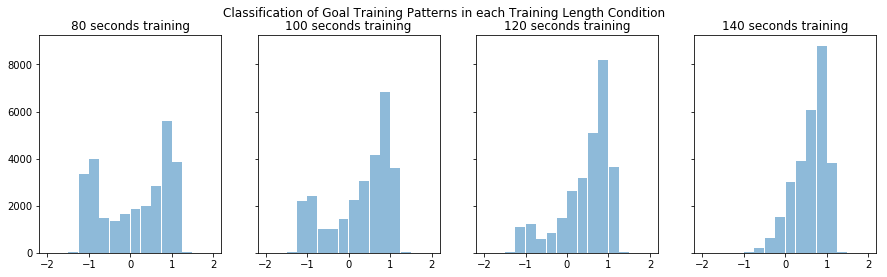

In [43]:
data_longer = pd.DataFrame(pytry.read('len_80_plus'))

list = [col for col in data_longer if col.startswith('accuracy_train')]

train_80 = pd.DataFrame(data_longer[:20])
train_100 = pd.DataFrame(data_longer[20:40])
train_120 = pd.DataFrame(data_longer[40:60])
train_140 = pd.DataFrame(data_longer[60:80])

goal_training_80 = pd.DataFrame({'goal_training_80': pd.concat([eval('train_80.accuracy_train%d' % i) for i in range(1400)])})
goal_training_100 = pd.DataFrame({'goal_training_100': pd.concat([eval('train_100.accuracy_train%d' % i) for i in range(1400)])})
goal_training_120 = pd.DataFrame({'goal_training_120': pd.concat([eval('train_120.accuracy_train%d' % i) for i in range(1400)])})
goal_training_140 = pd.DataFrame({'goal_training_140': pd.concat([eval('train_140.accuracy_train%d' % i) for i in range(1400)])})
noplay_training_80 = pd.DataFrame({'noplay_training_80': pd.concat([eval('train_80.accuracy_train%d' % i) for i in range(1400,2800)])})
noplay_training_100 = pd.DataFrame({'noplay_training_100': pd.concat([eval('train_100.accuracy_train%d' % i) for i in range(1400,2800)])})
noplay_training_120 = pd.DataFrame({'noplay_training_120': pd.concat([eval('train_120.accuracy_train%d' % i) for i in range(1400,2800)])})
noplay_training_140 = pd.DataFrame({'noplay_training_140': pd.concat([eval('train_140.accuracy_train%d' % i) for i in range(1400,2800)])})

goal_train_80 = goal_training_80.dropna()
goal_train_100 = goal_training_100.dropna()
goal_train_120 = goal_training_120.dropna()
goal_train_140 = goal_training_140.dropna()
noplay_train_80 = noplay_training_80.dropna()
noplay_train_100 = noplay_training_100.dropna()
noplay_train_120 = noplay_training_120.dropna()
noplay_train_140 = noplay_training_140.dropna()

gts_80 = pd.DataFrame({'goal_test': pd.concat([eval('train_80.accuracy_test%d' % i) for i in range(100)])})
gts_100 = pd.DataFrame({'goal_test': pd.concat([eval('train_100.accuracy_test%d' % i) for i in range(100)])})
gts_120 = pd.DataFrame({'goal_test': pd.concat([eval('train_120.accuracy_test%d' % i) for i in range(100)])})
gts_140 = pd.DataFrame({'goal_test': pd.concat([eval('train_140.accuracy_test%d' % i) for i in range(100)])})

nts_80 = pd.DataFrame({'noplay_test': pd.concat([eval('train_80.accuracy_test%d' % i) for i in range(100,200)])}) 
nts_100 = pd.DataFrame({'noplay_test': pd.concat([eval('train_100.accuracy_test%d' % i) for i in range(100,200)])}) 
nts_120 = pd.DataFrame({'noplay_test': pd.concat([eval('train_120.accuracy_test%d' % i) for i in range(100,200)])}) 
nts_140 = pd.DataFrame({'noplay_test': pd.concat([eval('train_140.accuracy_test%d' % i) for i in range(100,200)])}) 

ats_80 = pd.DataFrame({'aimless': pd.concat([eval('train_80.accuracy_aim%d' % i) for i in range(100)])})
ats_100 = pd.DataFrame({'aimless': pd.concat([eval('train_100.accuracy_aim%d' % i) for i in range(100)])})
ats_120 = pd.DataFrame({'aimless': pd.concat([eval('train_120.accuracy_aim%d' % i) for i in range(100)])})
ats_140 = pd.DataFrame({'aimless': pd.concat([eval('train_140.accuracy_aim%d' % i) for i in range(100)])})

goal_trainl80 = []
for i in range(len(goal_train_80)):
    a = goal_train_80.iloc[i].values
    #b = np.concatenate(a).ravel().tolist()
    goal_trainl80.append(a)
goal_trainl80 = np.asarray(goal_trainl80)

goal_trainl100 = []
for i in range(len(goal_train_100)):
    a = goal_train_100.iloc[i].values
    #b = np.concatenate(a).ravel().tolist()
    goal_trainl100.append(a)
goal_trainl100 = np.asarray(goal_trainl100)

goal_trainl120 = []
for i in range(len(goal_train_120)):
    a = goal_train_120.iloc[i].values
    #b = np.concatenate(a).ravel().tolist()
    goal_trainl120.append(a)
goal_trainl120 = np.asarray(goal_trainl120)

goal_trainl140 = []
for i in range(len(goal_train_140)):
    a = goal_train_140.iloc[i].values
    #b = np.concatenate(a).ravel().tolist()
    goal_trainl140.append(a)
goal_trainl140 = np.asarray(goal_trainl140)

goal_testl80 = []
for i in range(len(gts_80)):
    a = gts_80.iloc[i].values
    b = np.concatenate(a).ravel().tolist()
    goal_testl80.append(b)
goal_testl80 = np.asarray(goal_testl80)

goal_testl100 = []
for i in range(len(gts_100)):
    a = gts_100.iloc[i].values
    b = np.concatenate(a).ravel().tolist()
    goal_testl100.append(b)
goal_testl100 = np.asarray(goal_testl100)

goal_testl120 = []
for i in range(len(gts_120)):
    a = gts_120.iloc[i].values
    b = np.concatenate(a).ravel().tolist()
    goal_testl120.append(b)
goal_testl120 = np.asarray(goal_testl120)

goal_testl140 = []
for i in range(len(gts_140)):
    a = gts_140.iloc[i].values
    b = np.concatenate(a).ravel().tolist()
    goal_testl140.append(b)
goal_testl140 = np.asarray(goal_testl140)

noplay_trainl80 = []
for i in range(len(noplay_train_80)):
    a = noplay_train_80.iloc[i].values
    #b = np.concatenate(a).ravel().tolist()
    noplay_trainl80.append(a)
noplay_trainl80 = np.asarray(noplay_trainl80)

noplay_trainl100 = []
for i in range(len(noplay_train_100)):
    a = noplay_train_100.iloc[i].values
    #b = np.concatenate(a).ravel().tolist()
    noplay_trainl100.append(a)
noplay_trainl100 = np.asarray(noplay_trainl100)

noplay_trainl120 = []
for i in range(len(noplay_train_120)):
    a = noplay_train_120.iloc[i].values
    #b = np.concatenate(a).ravel().tolist()
    noplay_trainl120.append(a)
noplay_trainl120 = np.asarray(noplay_trainl120)

noplay_trainl140 = []
for i in range(len(noplay_train_140)):
    a = noplay_train_140.iloc[i].values
    #b = np.concatenate(a).ravel().tolist()
    noplay_trainl140.append(a)
noplay_trainl140 = np.asarray(noplay_trainl140)

noplay_testl80 = []
for i in range(len(nts_80)):
    a = nts_80.iloc[i].values
    b = np.concatenate(a).ravel().tolist()
    noplay_testl80.append(b)
noplay_testl80 = np.asarray(noplay_testl80)

noplay_testl100 = []
for i in range(len(nts_100)):
    a = nts_100.iloc[i].values
    b = np.concatenate(a).ravel().tolist()
    noplay_testl100.append(b)
noplay_testl100 = np.asarray(noplay_testl100)

noplay_testl120 = []
for i in range(len(nts_120)):
    a = nts_120.iloc[i].values
    b = np.concatenate(a).ravel().tolist()
    noplay_testl120.append(b)
noplay_testl120 = np.asarray(noplay_testl120)

noplay_testl140 = []
for i in range(len(nts_140)):
    a = nts_140.iloc[i].values
    b = np.concatenate(a).ravel().tolist()
    noplay_testl140.append(b)
noplay_testl140 = np.asarray(noplay_testl140)

aimlessl80 = []
for i in range(len(ats_80)):
    a = ats_80.iloc[i].values
    b = np.concatenate(a).ravel().tolist()
    aimlessl80.append(b)
aimlessl80 = np.asarray(aimlessl80)

aimlessl100 = []
for i in range(len(ats_100)):
    a = ats_100.iloc[i].values
    b = np.concatenate(a).ravel().tolist()
    aimlessl100.append(b)
aimlessl100 = np.asarray(aimlessl100)

aimlessl120 = []
for i in range(len(ats_120)):
    a = ats_120.iloc[i].values
    b = np.concatenate(a).ravel().tolist()
    aimlessl120.append(b)
aimlessl120 = np.asarray(aimlessl120)

aimlessl140 = []
for i in range(len(ats_140)):
    a = ats_140.iloc[i].values
    b = np.concatenate(a).ravel().tolist()
    aimlessl140.append(b)
aimlessl140 = np.asarray(aimlessl140)



bins=np.arange(-2, 2 + 0.25, 0.25)

f, (axl1, axl2, axl3, axl4) = plt.subplots(1, 4, sharey=True, figsize=(15, 4))
f.suptitle('Classification of Goal Training Patterns in each Training Length Condition')
axl1.hist(goal_trainl80, bins=bins, rwidth=0.95, alpha=0.5, label='80 seconds training')
axl1.set_title('80 seconds training')
axl2.hist(goal_trainl100, bins=bins, rwidth=0.95, alpha=0.5, label='100 seconds training')
axl2.set_title('100 seconds training')
axl3.hist(goal_trainl120, bins=bins, rwidth=0.95, alpha=0.5, label='120 seconds training')
axl3.set_title('120 seconds training')
axl4.hist(goal_trainl140, bins=bins, rwidth=0.95, alpha=0.5, label='140 seconds training')
axl4.set_title('140 seconds training')

Text(0.5,1,'140 seconds training')

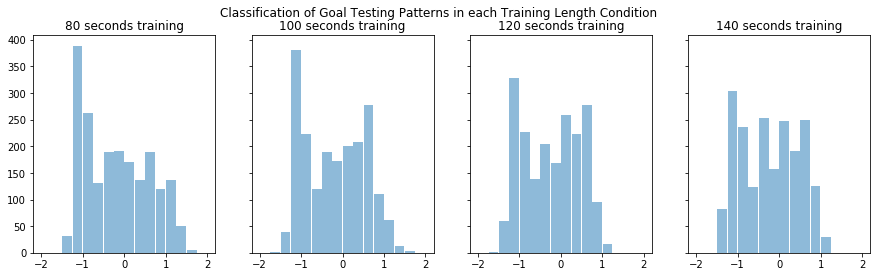

In [44]:
f, (axl1, axl2, axl3, axl4) = plt.subplots(1, 4, sharey=True, figsize=(15, 4))
f.suptitle('Classification of Goal Testing Patterns in each Training Length Condition')
axl1.hist(goal_testl80, bins=bins, rwidth=0.95, alpha=0.5, label='80 seconds training')
axl1.set_title('80 seconds training')
axl2.hist(goal_testl100, bins=bins, rwidth=0.95, alpha=0.5, label='100 seconds training')
axl2.set_title('100 seconds training')
axl3.hist(goal_testl120, bins=bins, rwidth=0.95, alpha=0.5, label='120 seconds training')
axl3.set_title('120 seconds training')
axl4.hist(goal_testl140, bins=bins, rwidth=0.95, alpha=0.5, label='140 seconds training')
axl4.set_title('140 seconds training')

Text(0.5,1,'140 seconds training')

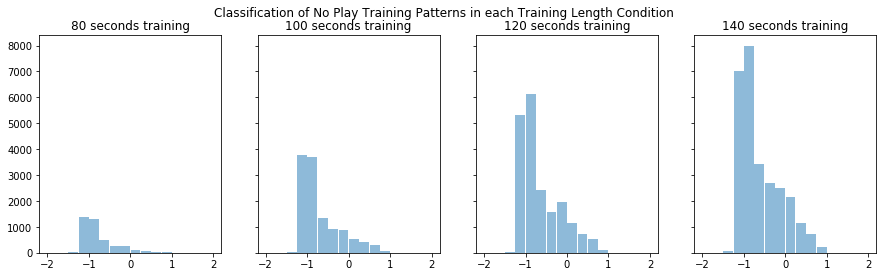

In [45]:
f, (axl1, axl2, axl3, axl4) = plt.subplots(1, 4, sharey=True, figsize=(15, 4))
f.suptitle('Classification of No Play Training Patterns in each Training Length Condition')
axl1.hist(noplay_trainl80, bins=bins, rwidth=0.95, alpha=0.5, label='80 seconds training')
axl1.set_title('80 seconds training')
axl2.hist(noplay_trainl100, bins=bins, rwidth=0.95, alpha=0.5, label='100 seconds training')
axl2.set_title('100 seconds training')
axl3.hist(noplay_trainl120, bins=bins, rwidth=0.95, alpha=0.5, label='120 seconds training')
axl3.set_title('120 seconds training')
axl4.hist(noplay_trainl140, bins=bins, rwidth=0.95, alpha=0.5, label='140 seconds training')
axl4.set_title('140 seconds training')

Text(0.5,1,'140 seconds training')

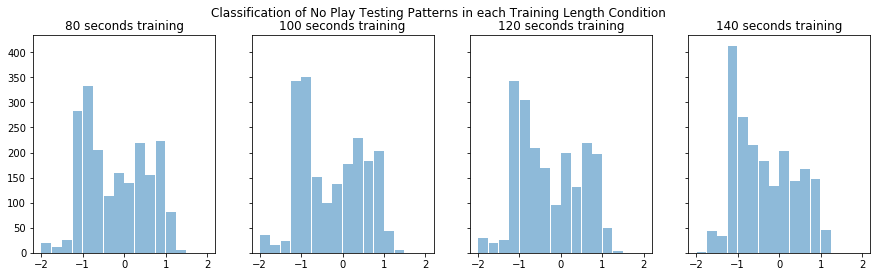

In [46]:
f, (axl1, axl2, axl3, axl4) = plt.subplots(1, 4, sharey=True, figsize=(15, 4))
f.suptitle('Classification of No Play Testing Patterns in each Training Length Condition')
axl1.hist(noplay_testl80, bins=bins, rwidth=0.95, alpha=0.5, label='80 seconds training')
axl1.set_title('80 seconds training')
axl2.hist(noplay_testl100, bins=bins, rwidth=0.95, alpha=0.5, label='100 seconds training')
axl2.set_title('100 seconds training')
axl3.hist(noplay_testl120, bins=bins, rwidth=0.95, alpha=0.5, label='120 seconds training')
axl3.set_title('120 seconds training')
axl4.hist(noplay_testl140, bins=bins, rwidth=0.95, alpha=0.5, label='140 seconds training')
axl4.set_title('140 seconds training')

Text(0.5,1,'140 seconds training')

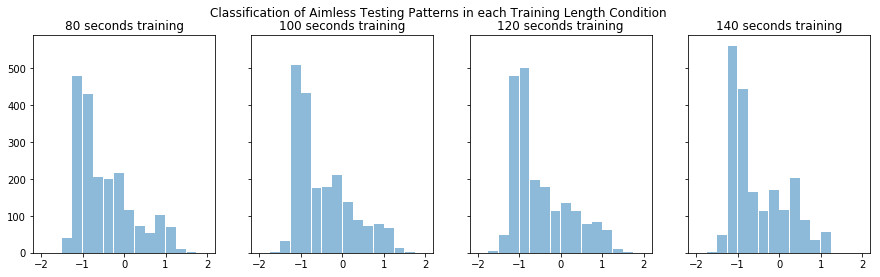

In [47]:
f, (axl1, axl2, axl3, axl4) = plt.subplots(1, 4, sharey=True, figsize=(15, 4))
f.suptitle('Classification of Aimless Testing Patterns in each Training Length Condition')
axl1.hist(aimlessl80, bins=bins, rwidth=0.95, alpha=0.5, label='80 seconds training')
axl1.set_title('80 seconds training')
axl2.hist(aimlessl100, bins=bins, rwidth=0.95, alpha=0.5, label='100 seconds training')
axl2.set_title('100 seconds training')
axl3.hist(aimlessl120, bins=bins, rwidth=0.95, alpha=0.5, label='120 seconds training')
axl3.set_title('120 seconds training')
axl4.hist(aimlessl140, bins=bins, rwidth=0.95, alpha=0.5, label='140 seconds training')
axl4.set_title('140 seconds training')

# Only Face and Skeleton Data Points

Running experiments with length 40, 2 dimensions, only using face and skeleton points as input.

In [ ]:
data_skel = pd.DataFrame(pytry.read('face_skel'))

gtrx = pd.DataFrame({'goal_train': pd.concat([eval('data_skel.accuracy_train%d' % i) for i in range(400)])})

gtsx = pd.DataFrame({'goal_test': pd.concat([eval('data_skel.accuracy_test%d' % i) for i in range(100)])})

ntrx = pd.DataFrame({'noplay_train': pd.concat([eval('data_skel.accuracy_train%d' % i) for i in range(400,800)])})

ntsx = pd.DataFrame({'noplay_test': pd.concat([eval('data_skel.accuracy_test%d' % i) for i in range(100,200)])}) 

ax = pd.DataFrame({'aimless': pd.concat([eval('data_skel.accuracy_aim%d' % i) for i in range(100)])})

goal_train = []
for i in range(len(gtrx)):
    a = gtrx.iloc[i].values
    b = np.concatenate(a).ravel().tolist()
    goal_train.append(b)
goal_train = np.asarray(goal_train)

goal_test = []
for i in range(len(gtsx)):
    a = gtsx.iloc[i].values
    b = np.concatenate(a).ravel().tolist()
    goal_test.append(b)
goal_test = np.asarray(goal_test)

noplay_train = []
for i in range(len(ntrx)):
    a = ntrx.iloc[i].values
    b = np.concatenate(a).ravel().tolist()
    noplay_train.append(b)
noplay_train = np.asarray(noplay_train)

noplay_test = []
for i in range(len(ntsx)):
    a = ntsx.iloc[i].values
    b = np.concatenate(a).ravel().tolist()
    noplay_test.append(b)
noplay_test = np.asarray(noplay_test)

aimless = []
for i in range(len(ax)):
    a = ax.iloc[i].values
    b = np.concatenate(a).ravel().tolist()
    aimless.append(b)
aimless = np.asarray(aimless)

bins=np.arange(-2, 2 + 0.25, 0.25)
plt.hist(goal_train, bins=bins, rwidth=0.95, alpha=0.65, label='goal train')
plt.hist(goal_test, bins=bins, rwidth=0.95, alpha=0.65, label='goal test')
plt.legend(loc='upper right')

In [ ]:
plt.hist(noplay_train, bins=bins, rwidth=0.95, alpha=0.65, label='noplay train')
plt.hist(noplay_test, bins=bins, rwidth=0.95, alpha=0.65, label='noplay test')
plt.legend(loc='upper right')

In [ ]:
plt.hist(aimless, bins=bins, rwidth=0.95, alpha=0.5, label='aimless test')

In [ ]:
plt.hist(goal_test, bins=bins, rwidth=0.95, alpha=0.5, label='goal test', histtype=u'step')
plt.hist(aimless, bins=bins, rwidth=0.95, alpha=0.5, label='aimless test', histtype=u'step')
plt.hist(noplay_test, bins=bins, rwidth=0.95, alpha=0.5, label='noplay test', histtype=u'step')
plt.legend(loc='upper right')